In [4]:
import pandas as pd

#Reading data from dataset
df = pd.read_csv("health.csv")
#display(df)
# Cleaning data (Removing NULL values from dataset)
df = df.dropna()
#display(df)

df = pd.read_csv("health.csv")
#Creating training/test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.25, random_state=300)
print(train_set.head())
print(test_set.head())

        State_Name State_District_Name  AA_Sample_Units_Total  \
210  Uttar Pradesh           Balrampur                     32   
140         Odisha            Balangir                     60   
31           Bihar                Gaya                     51   
35           Bihar     Kaimur (Bhabua)                     57   
181      Rajasthan            Dhaulpur                     42   

     AA_Sample_Units_Rural  AA_Sample_Units_Urban  AA_Households_Total  \
210                     28                      4                 7315   
140                     50                     10                11768   
31                      41                     10                 8931   
35                      54                      3                10555   
181                     31                     11                 7200   

     AA_Households_Rural  AA_Households_Urban  AA_Population_Total  \
210                 7044                  271                42016   
140                10710

In [5]:
from sklearn.preprocessing import LabelEncoder

datafrm = pd.DataFrame(df)
var_mod = ['AA_Population_Total','AA_Households_Total','ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit']
lbl_encdr = LabelEncoder()
for i in var_mod:
    datafrm[i] = lbl_encdr.fit_transform(datafrm[i])
datafrm

,State_Name,State_District_Name,AA_Sample_Units_Total,AA_Sample_Units_Rural,AA_Sample_Units_Urban,AA_Households_Total,AA_Households_Rural,AA_Households_Urban,AA_Population_Total,AA_Population_Rural,...,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
0,Assam,Barpeta,53,47,6,150,12765,946,140,60293,...,54,70,NaN,NaN,79,985,851,965,908.0,1611.0
1,Assam,Bongaigaon,89,73,16,207,14904,2480,203,73899,...,58,73,NaN,NaN,102,1005,911,1026,621.0,956.0
2,Assam,Cachar,105,84,21,266,24207,3281,260,112171,...,68,80,31.0,57.0,97,966,871,949,905.0,1168.0
3,Assam,Darrang,26,24,2,8,5769,182,10,28256,...,79,107,NaN,NaN,113,1102,908,1097,NaN,NaN
4,Assam,Dhemaji,121,108,13,163,12619,1862,182,66537,...,40,53,11.0,38.0,126,1045,938,1054,772.0,1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Uttarakhand,Pithoragarh,161,136,25,255,20467,4798,232,84627,...,24,34,NaN,NaN,0,813,734,833,581.0,798.0
280,Uttarakhand,Rudraprayag,225,222,3,271,32914,203,266,138266,...,23,30,NaN,NaN,32,898,816,897,NaN,NaN
281,Uttarakhand,Tehri Garhwal,351,317,34,279,42354,5438,280,181918,...,64,74,22.0,43.0,52,900,855,918,667.0,842.0
282,Uttarakhand,Udham Singh Nagar,81,45,36,212,12393,5494,216,64614,...,40,54,26.0,46.0,35,920,855,978,710.0,879.0


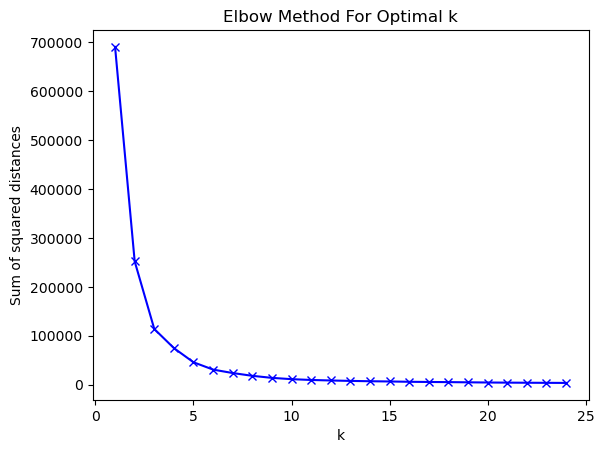

Distortion:  252151.19562043797
Average of square root:  29.796918005175904
Centroids: 
 [[  4.46350365  65.3540146 ]
 [  4.         278.6       ]]
Assignments:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0]


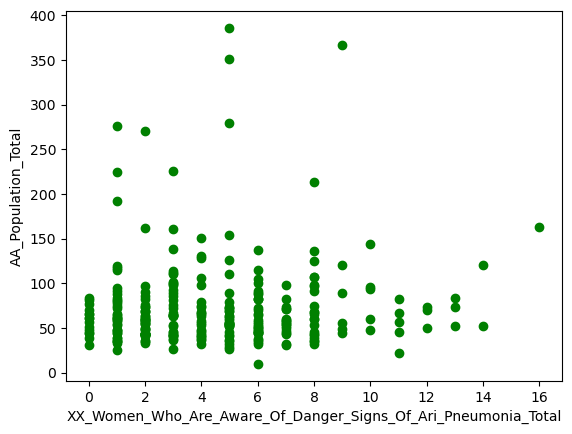

In [7]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

datafrm['a'] = datafrm['MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total'].astype(int)
datafrm['b'] = datafrm['AA_Population_Total'].astype(int)
datafrm['c'] = datafrm['AA_Sample_Units_Total'].astype(float)
datafrm['d'] = datafrm['YY_Crude_Death_Rate_Cdr_Total_Person'].astype(int)
# datafrm['e'] = datafrm['smoker'].astype(int)
datafrm['f'] = datafrm['XX_Women_Who_Are_Aware_Of_Danger_Signs_Of_Ari_Pneumonia_Total'].astype(float)

X = datafrm[['a','c']]

kmean = KMeans(n_clusters=2)
kmean.fit(X)

sosqud = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sosqud.append(km.inertia_)

plt.plot(K, sosqud, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("Distortion: ", kmean.inertia_)
RMSavg = math.sqrt(kmean.inertia_ / len(X))

print("Average of square root: ", RMSavg)
print("Centroids: \n", kmean.cluster_centers_)
print("Assignments: ", kmean.labels_)

plt.scatter(datafrm['a'], datafrm['c'], color="green")
plt.xlabel("XX_Women_Who_Are_Aware_Of_Danger_Signs_Of_Ari_Pneumonia_Total")
plt.ylabel("AA_Population_Total")
plt.show()

clus_x = [x for [x,y] in kmean.cluster_centers_]
clus_y = [y for [x,y] in kmean.cluster_centers_]

# plt.scatter(datafrm['a'], datafrm['c'], c=kmean.labels_)
# plt.scatter(clus_x, clus_y, marker="+", color="red")
# plt.xlabel("age")
# plt.ylabel("bmi")
# plt.axis("scaled")
# plt.show()

LinearRegression()
0.3227734763139901
mean squared error is  6.852248067190668
The root mean squared error is  0.3227734763139901


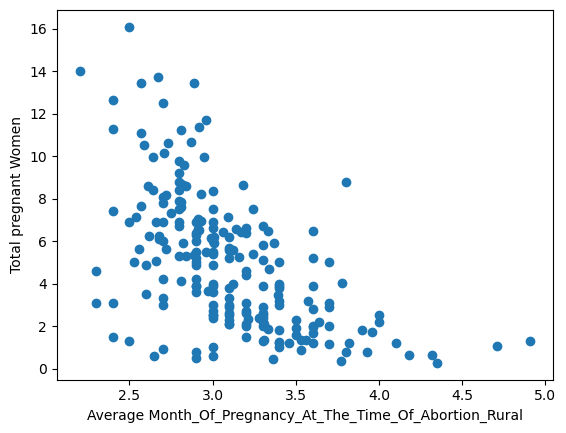

In [14]:
# plt.scatter(datafrm['a'], datafrm['c'], color="green")
# plt.xlabel("MM_Average_Month_Of_Pregnancy_At_The_Time_Of_Abortion_Rural")
# plt.ylabel("AA_Population_Total")
# plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from math import sqrt
lreg = LinearRegression()
X = train_set[["MM_Average_Month_Of_Pregnancy_At_The_Time_Of_Abortion_Rural"]].values
Y = train_set["MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total"].values

print(lreg.fit(X, Y))

print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)

import matplotlib.pyplot as plt
plt.scatter(train_set["MM_Average_Month_Of_Pregnancy_At_The_Time_Of_Abortion_Rural"], train_set["MM_Pregnancy_To_Women_Aged_15_49_Years_Resulting_In_Abortion_Total"])
plt.xlabel("Average Month_Of_Pregnancy_At_The_Time_Of_Abortion_Rural")
plt.ylabel("Total pregnant Women")
# plt.plot(X, Y, color="orange")
plt.show()